# Salary Predictions Based on Job Descriptions

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
import sys
from IPython.core.pylabtools import figsize

## Part 1 - DEFINE

Our problem consisted in looking through a simple dataset and applying some analytics so we could find correlations between the caracteristics of it with the salary outcome related with this positions. It wasn't just a single feature that matter, but to actually understand how this informations can translate into a inteligence - or, if the fatures can make up a model prediction to output the salary.

This notebook constains solely the exploratory data analysis (EDA) that compounds the first essencial part in datascience good practices. The second notebook will contain the modeling and predicting part of the project. 

## Part 2 - DISCOVER

### 2. Loading the data

In [2]:
df = pd.read_csv('data/train_features.csv')
target_df = pd.read_csv('data/train_salaries.csv')
test_df = pd.read_csv('data/test_features.csv')

In [3]:
merged = df.merge(target_df, how='left', on='jobId')
merged.head()

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary
0,JOB1362684407687,COMP37,CFO,MASTERS,MATH,HEALTH,10,83,130
1,JOB1362684407688,COMP19,CEO,HIGH_SCHOOL,NONE,WEB,3,73,101
2,JOB1362684407689,COMP52,VICE_PRESIDENT,DOCTORAL,PHYSICS,HEALTH,10,38,137
3,JOB1362684407690,COMP38,MANAGER,DOCTORAL,CHEMISTRY,AUTO,8,17,142
4,JOB1362684407691,COMP7,VICE_PRESIDENT,BACHELORS,PHYSICS,FINANCE,8,16,163


Over here are all the raw features passed that compose this dataframe. All features are well specified and self-explainatory.

### 3. Cleaning the data
Here's where look for duplicate data, invalid or corrupt data in order to remove it

In [4]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
jobId                  1000000 non-null object
companyId              1000000 non-null object
jobType                1000000 non-null object
degree                 1000000 non-null object
major                  1000000 non-null object
industry               1000000 non-null object
yearsExperience        1000000 non-null int64
milesFromMetropolis    1000000 non-null int64
salary                 1000000 non-null int64
dtypes: int64(3), object(6)
memory usage: 76.3+ MB


#### Check for duplicates

In [7]:
merged.jobId.nunique() == len(df)

True

#### Check for null values

In [8]:
merged.isnull().sum().sort_values(ascending=False)

salary                 0
milesFromMetropolis    0
yearsExperience        0
industry               0
major                  0
degree                 0
jobType                0
companyId              0
jobId                  0
dtype: int64

#### Check for unique values:
    - discrete feature w only one value (not explainatory)
    - discrete feature w high cardinality

In [9]:
merged.nunique().sort_values(ascending=False)

jobId                  1000000
salary                     280
milesFromMetropolis        100
companyId                   63
yearsExperience             25
major                        9
jobType                      8
industry                     7
degree                       5
dtype: int64

## 4 Explore the data (EDA)
### Single-variable plots

In [35]:
merged.salary.describe()

count    1000000.000000
mean         116.061818
std           38.717936
min            0.000000
25%           88.000000
50%          114.000000
75%          141.000000
max          301.000000
Name: salary, dtype: float64

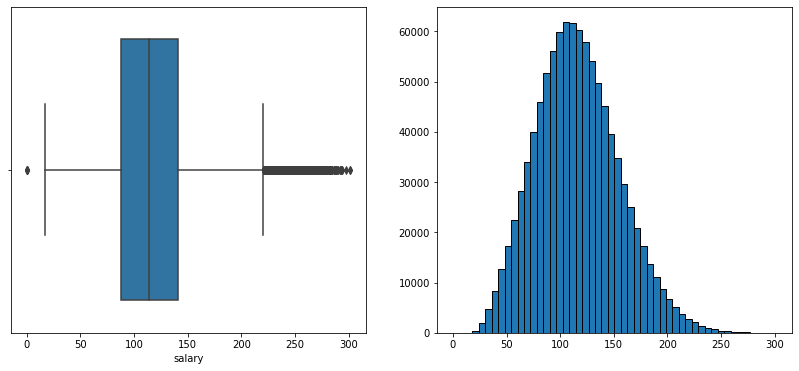

In [39]:
plt.figure(figsize = (14, 6))
plt.subplot(1,2,1)
sns.boxplot(target_df.salary)
plt.subplot(1,2,2)
plt.hist(target_df['salary'], bins =50, edgecolor = 'k')
plt.show()

#### Dealing with outliers

In [5]:
Q1 = merged['salary'].describe()['25%']
Q3 = merged['salary'].describe()['75%']

#interquartile range
IQR = Q3 - Q1

#Remove Outliers
merged = merged[(merged['salary'] > (Q1 - 3*IQR)) & (merged['salary'] < (Q3 + 3*IQR))]
print('The upper and lower bounds for alleged outliers are {} and {}.'.format((Q1-1.5*IQR), (Q3+1.5*IQR)))

The upper and lower bounds for alleged outliers are 8.5 and 220.5.


In [42]:
merged[merged.salary < 8.5]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,milesqcut,yearsqcut
30559,JOB1362684438246,COMP44,JUNIOR,DOCTORAL,MATH,AUTO,11,7,0,up to 25miles,up to 12y
495984,JOB1362684903671,COMP34,JUNIOR,NONE,NONE,OIL,1,25,0,up to 25miles,up to 6y
652076,JOB1362685059763,COMP25,CTO,HIGH_SCHOOL,NONE,AUTO,6,60,0,up to 75miles,up to 6y
816129,JOB1362685223816,COMP42,MANAGER,DOCTORAL,ENGINEERING,FINANCE,18,6,0,up to 25miles,up to 18y
828156,JOB1362685235843,COMP40,VICE_PRESIDENT,MASTERS,ENGINEERING,WEB,3,29,0,up to 50miles,up to 6y


In [55]:
merged[(merged.salary>220.5)]

,jobId,companyId,jobType,degree,major,industry,yearsExperience,milesFromMetropolis,salary,milesqcut,yearsqcut
266,JOB1362684407953,COMP30,CEO,MASTERS,BIOLOGY,OIL,23,60,223,up to 75miles,up to 24y
362,JOB1362684408049,COMP38,CTO,MASTERS,NONE,HEALTH,24,3,223,up to 25miles,up to 24y
560,JOB1362684408247,COMP53,CEO,MASTERS,BIOLOGY,WEB,22,7,248,up to 25miles,up to 24y
670,JOB1362684408357,COMP26,CEO,MASTERS,MATH,AUTO,23,9,240,up to 25miles,up to 24y
719,JOB1362684408406,COMP54,VICE_PRESIDENT,DOCTORAL,BIOLOGY,OIL,21,14,225,up to 25miles,up to 24y
...,...,...,...,...,...,...,...,...,...,...,...
998516,JOB1362685406203,COMP29,CFO,MASTERS,ENGINEERING,WEB,14,46,227,up to 50miles,up to 18y
999249,JOB1362685406936,COMP30,CEO,NONE,NONE,OIL,17,10,223,up to 25miles,up to 18y
999280,JOB1362685406967,COMP2,CFO,BACHELORS,BUSINESS,SERVICE,21,0,228,up to 25miles,up to 24y
999670,JOB1362685407357,COMP20,CEO,DOCTORAL,LITERATURE,SERVICE,24,14,233,up to 25miles,up to 24y


#### Removing outliers

After carefully examining the values of the target that stood outside the superior and inferior margin for quartiles, no conclusions could be drawn from the superior bound since multiple factors apply and discarding the data seemed precocious. However it's clear that salaries of 0 are just corrupt data and therefore should be excluded from our analysis.

In [6]:
merged = merged[merged.salary > 8.5]

## Two Variable Plots
### Density plots for descriptive variables

In [10]:
numeric_cols = ['yearsExperience', 'milesFromMetropolis']
categorical_cols = ['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry']
cols_to_filter = ['jobId', 'companyId']
label = 'salary'

In [7]:
merged['milesqcut'] = pd.qcut(merged['milesFromMetropolis'], q=4, labels=['up to 25miles', 'up to 50miles','up to 75miles','up to 99miles']) #to make quantiles in describe function
merged['yearsqcut'] = pd.qcut(merged['yearsExperience'], q=4, labels=['up to 6y', 'up to 12y','up to 18y','up to 24y']) #to make quantiles in describe function

In [20]:
merged =merged.rename(columns={'milesqcut':'MilesFromMetropolisBins', 'yearsqcut':'YearsOfExperienceBins'})

In [21]:
merged.columns

Index(['jobId', 'companyId', 'jobType', 'degree', 'major', 'industry',
       'yearsExperience', 'milesFromMetropolis', 'salary',
       'MilesFromMetropolisBins', 'YearsOfExperienceBins'],
      dtype='object')

In [17]:
def two_variable_plots(df, nrows, ncols):
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(nrows*10, ncols*20))

    cols_list = np.array(df.columns.drop(['salary', 'jobId', 
                                              'companyId','milesFromMetropolis','yearsExperience'])).reshape(3,2)
    for col_row, ax_row in zip(cols_list, axes):
        for unit, ax in zip(col_row, ax_row):

            for subject in df[unit].unique():
                subset = df[df[unit] == subject]
                sns.kdeplot(subset['salary'], label=subject, shade=False, alpha=0.8, ax=ax)
                ax.set_title(unit)
                

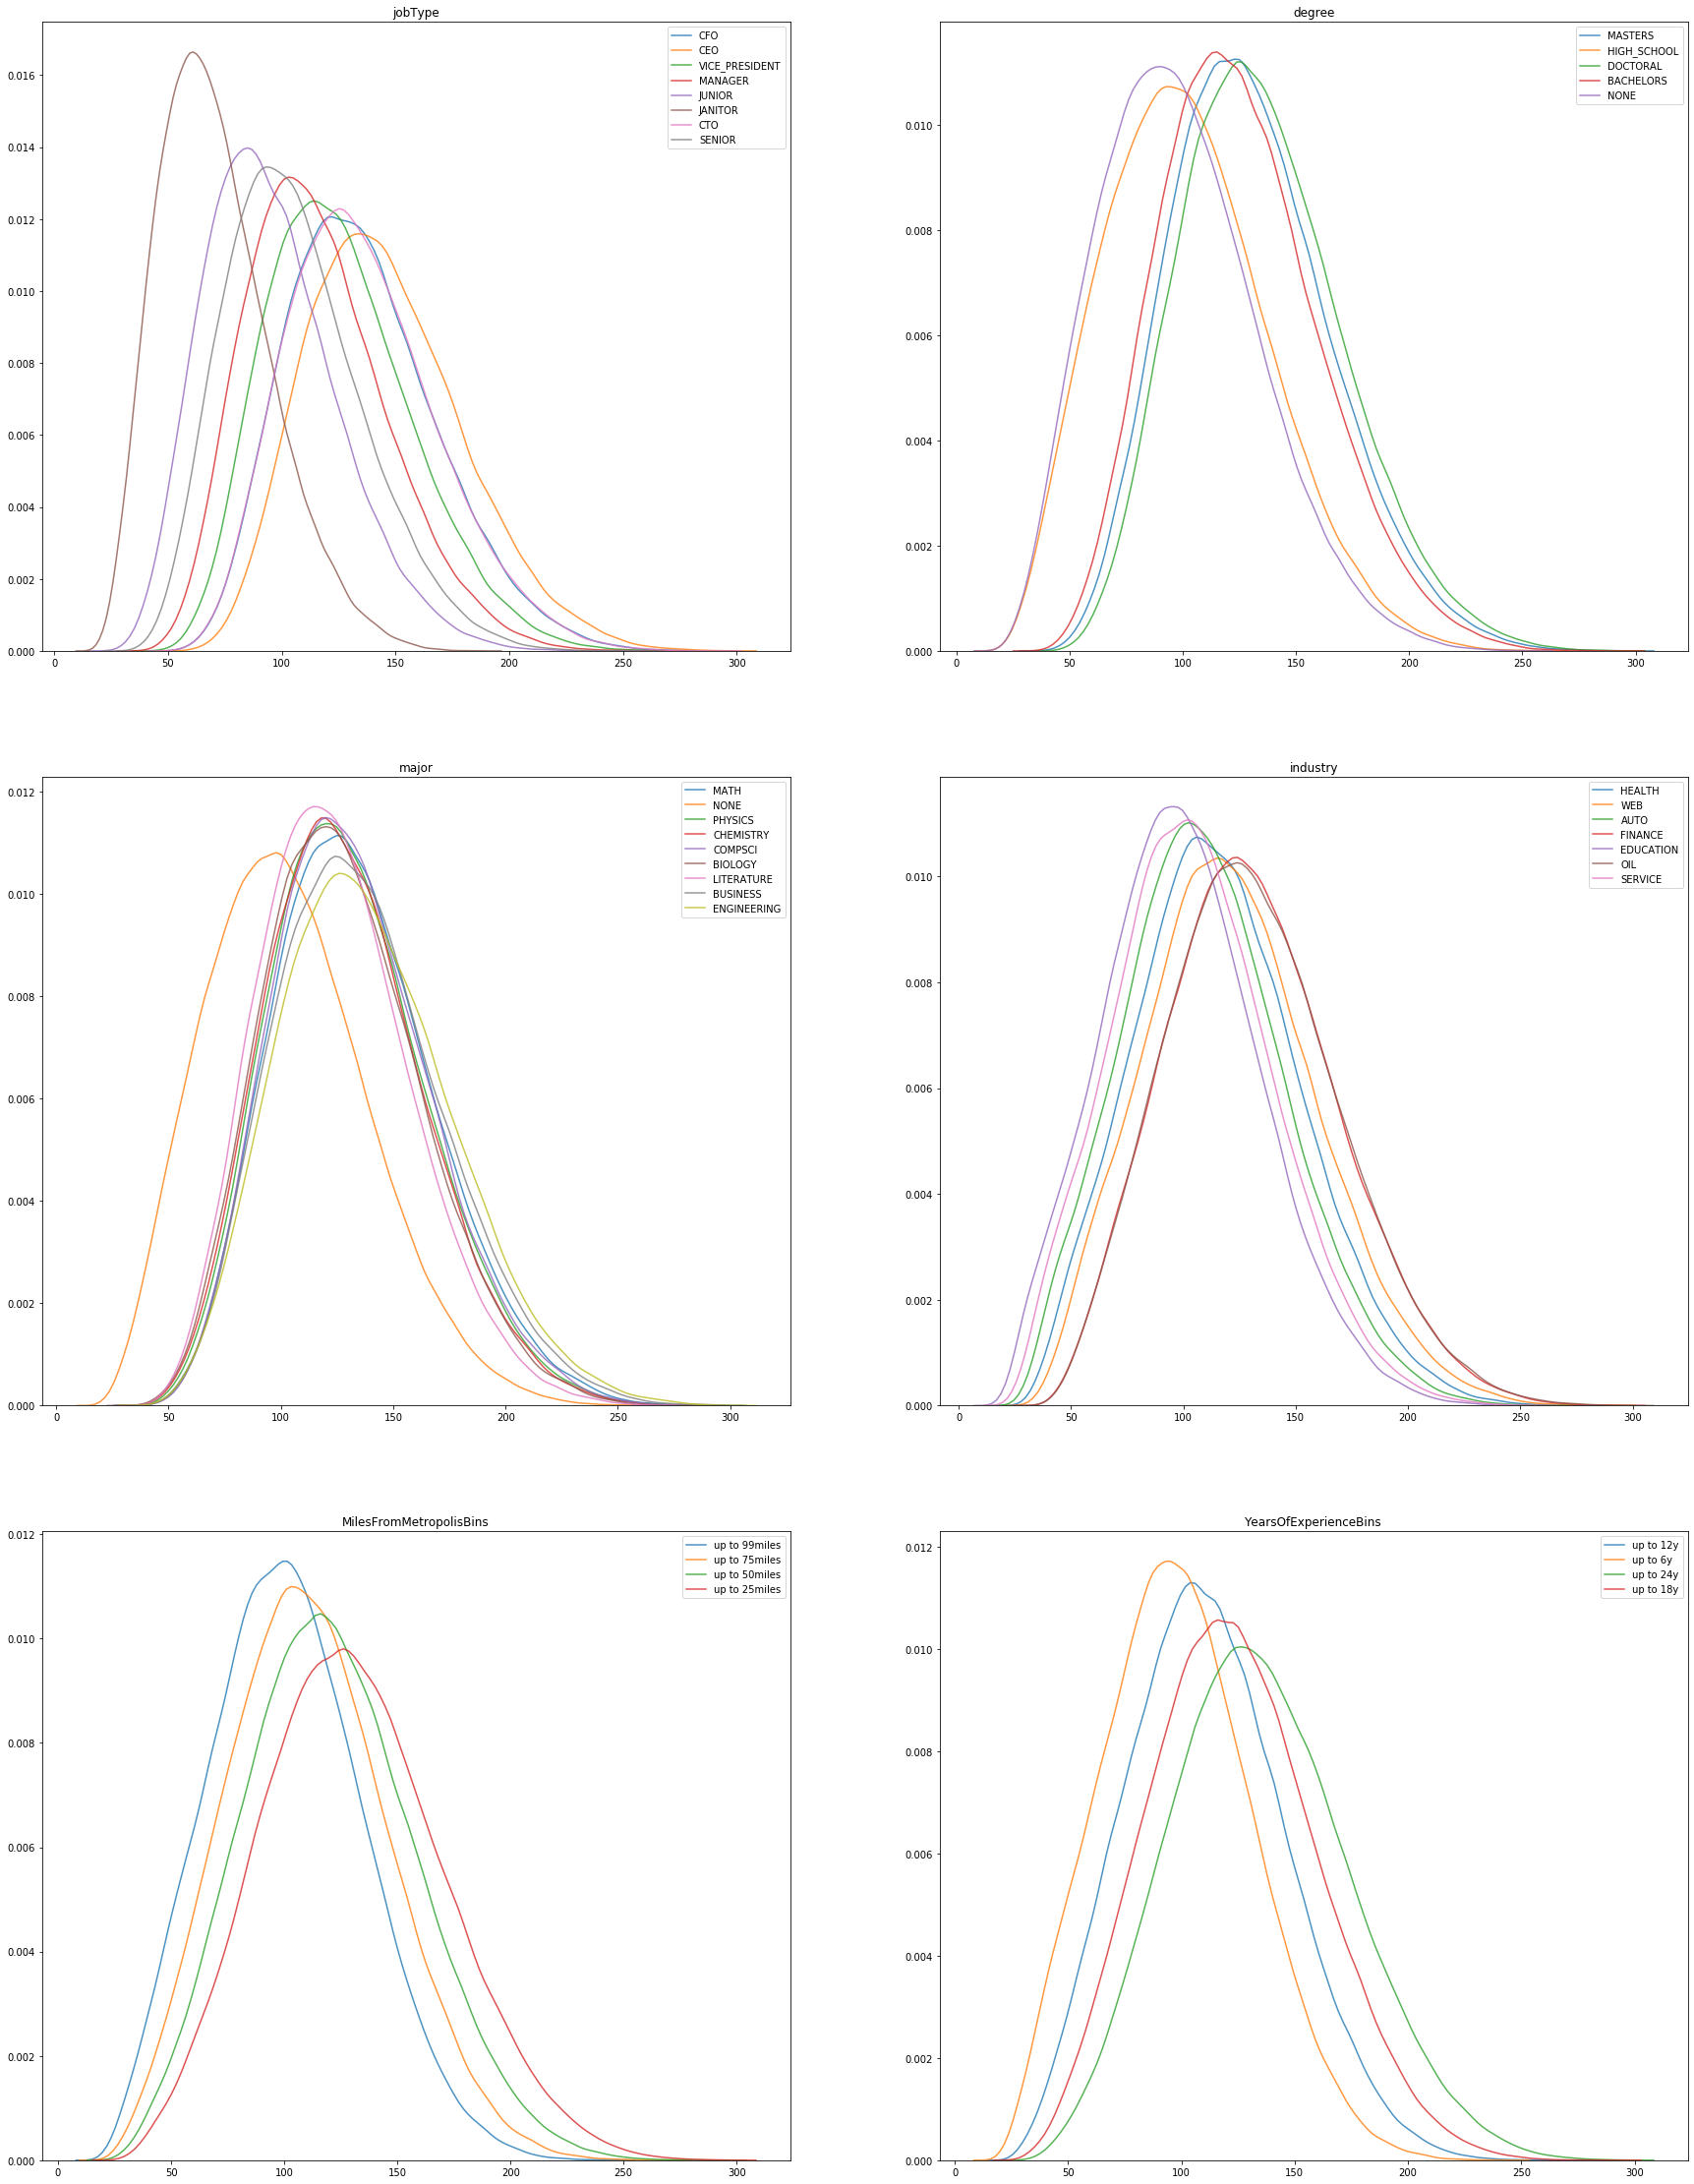

In [22]:
two_variable_plots(merged, 3, 2)

- As for job types, the positions of high scaler are the ones with higher salaries (CEO, CFO, CTO)
- Larger salaries happen also for higher skilled educations (Doctors, Masters, bachelors)
- The fields that have the largest salaries are for Engineering, Business and Math
- As for industries: Oil and Finance are the higher payers
- And for the numerical variables, those closer to the metropolis and the positions that require more experience also tends to pay more

### Scatterplot for Numerical columns

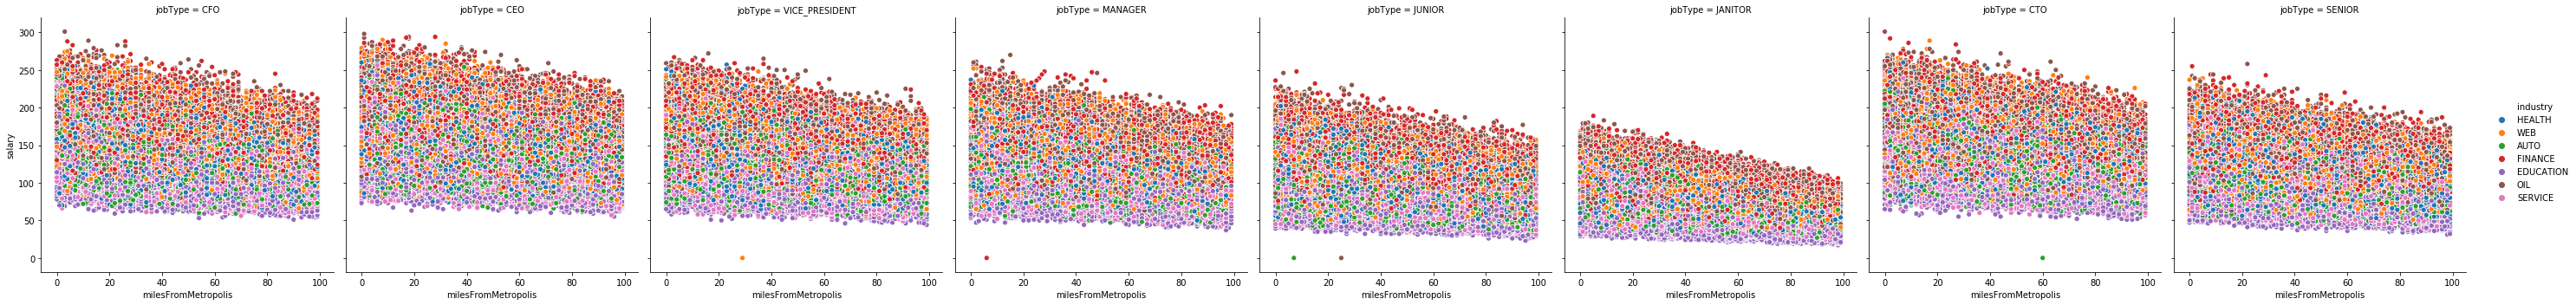

In [33]:
sns.relplot(x= 'milesFromMetropolis', y = 'salary', hue='industry', col='jobType', kind = 'scatter', data= merged)

For all of job professions, it seems that salary has a negative correlation with distance from metropolis. The longer the job position is, the lesser it tends to be paid.

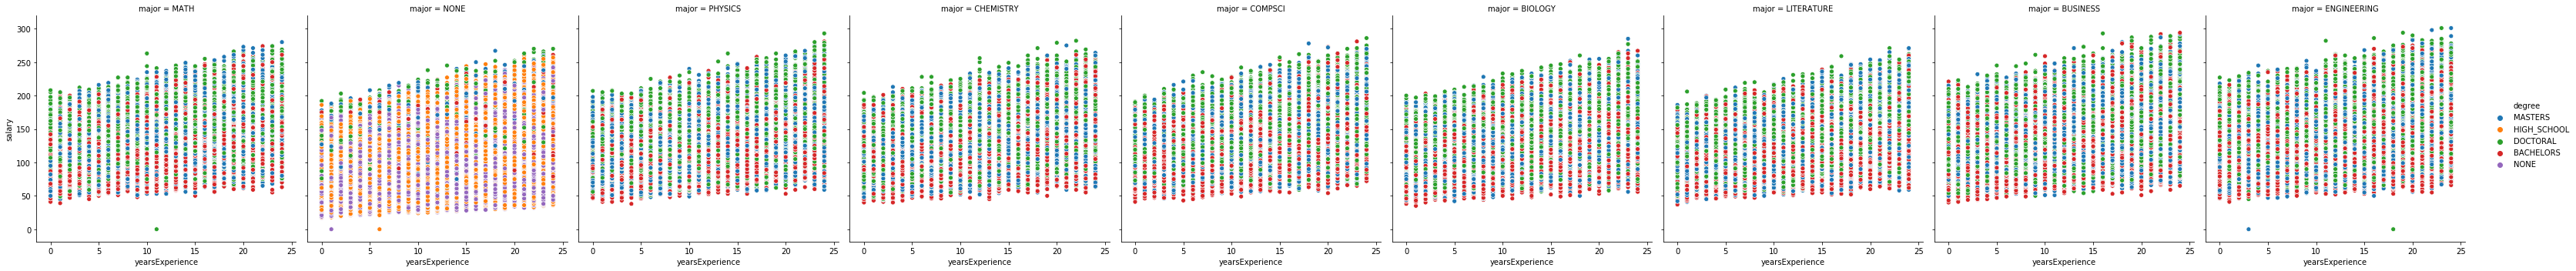

In [38]:
sns.relplot(x= 'yearsExperience', y = 'salary', data= merged, hue='degree', col='major', kind = 'scatter')

For all of the majors, it seems that the salary has a positive correlation with years of experience

### 5 Establishing a baseline

Based on our assumptions, the metric we will be using for this model is the MSE, based on being easier to visualize and explain our label. And our baseline will be just the label's median

In [15]:
def MSE(y_goal, y_pred):
    return np.mean(np.sqrt(y_goal - y_pred))

baseline = np.median(merged[label])

print('Our baseline is %0.2f' % baseline)
print("For this data, a baseline has an: MSE = %0.4f" % MSE(merged[label], baseline))

Our baseline is 114.00
Para o teste, a baseline tem um erro de: MSE = 5.2150


### 6 Hypothesys 

Based on the features we've seen, the models that would be most accurate would be ensable models. I would like to try first the linear regression due to its plots that indicate strong correlation between the features and also two tree based models that are simple and have a very good predictive power

Also, even though the dataframe is not small at all, the features that are most categorical need some adjustments and might be a good fit to try label enconding, so we won't end up with a matrix so sparse. All that can be found in the next notebook